### Inferential Statistics Challenge

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# os.chdir("/Users/adeniyiharrison/Desktop/General Assembly/DS-SF-32/dataset")
# df = pd.read_csv("police-killings.csv", index_col = 0, encoding='latin-1')

In [9]:
df.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'lawenforcementagency', 'cause',
       'armed', 'county_income'],
      dtype='object')

### Challenge 1

+ Calculate The Standard Deviation For Age
+ Without using the standard deviation function


In [27]:
def standardDiv(column):
    n = df[column].count()
    mean = df[column].mean()
    values = []
    for x in df[column]:
        values.append((x - mean)**2) 

    print(np.sqrt(sum(value)/n))

In [28]:
standardDiv("age")

12.9307500683


In [23]:
df["age"].std()

12.944616828363481

### Challenge 2

+ Check to see if age is normally distributed

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


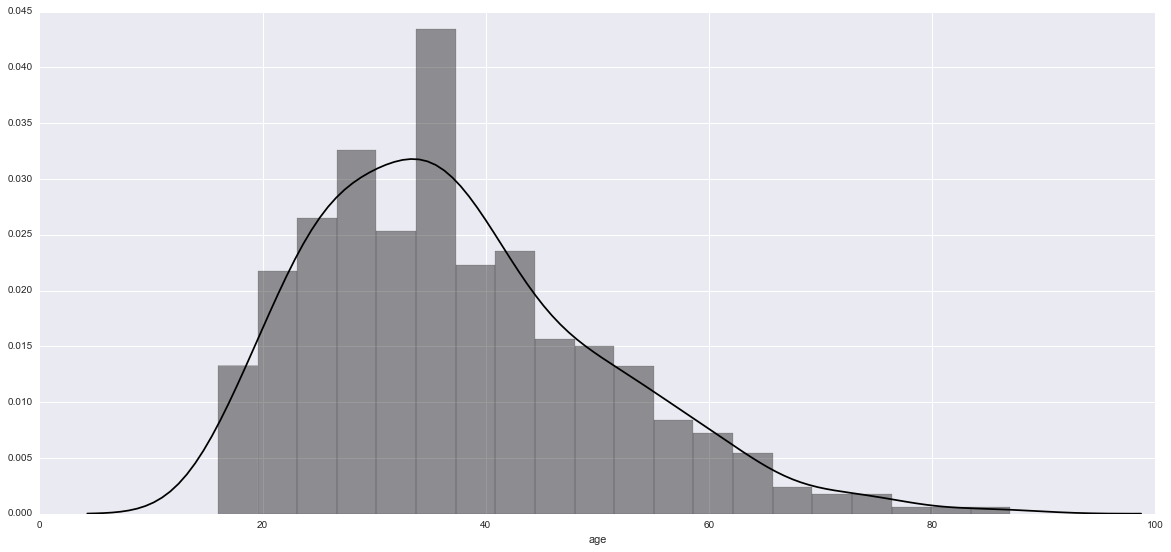

In [46]:
import seaborn as sns

plt.figure(figsize = (20,9))

sns.distplot(df["age"], bins = 20, color = "black")

### Challenge 3

+ Write your own code for a t-test, manually
+ Are white victims significantly older or younger than non-white victims?

In [52]:
whiteVictims = df[df["raceethnicity"] == "White"]["age"]
otherVictims = df[df["raceethnicity"] != "White"]["age"]

In [65]:
def tScore(set1, set2):
    x1 = np.mean(set1)
    x2 = np.mean(set2)

    s1 = np.std(set1)**2
    s2 = np.std(set2)**2

    n1 = set1.count()
    n2 = set2.count()

    diff = x1 - x2 
    y1 = s1/n1
    y2 = s2/n2

    t = diff / np.sqrt(y1 + y2)

    print(t)

In [66]:
tScore(whiteVictims, otherVictims)

5.43353159808


In [78]:
# import scipy.stats
scipy.stats.ttest_ind(whiteVictims, otherVictims)

Ttest_indResult(statistic=5.4134143501841283, pvalue=9.9263688861270646e-08)